# Exploratory Data Analysis on Employees Dataset :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Step 1: Import and Inspect the Data :

In [2]:
data = pd.read_csv('employees.csv')
data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [3]:
data.shape

(1000, 8)

In [4]:
data.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [5]:
data["Team"].unique()

array(['Marketing', nan, 'Finance', 'Client Services', 'Legal', 'Product',
       'Engineering', 'Business Development', 'Human Resources', 'Sales',
       'Distribution'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [7]:
data.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [8]:
data.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


### Step 2: Handling Missing Values :

In [9]:
data.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

##### let’s fill in the missing values of gender with the string “No Gender”

In [10]:
data["Gender"].fillna("No Gender", inplace = True) 
data.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

##### Let’s fill the senior management with the mode value (most frequently value).

In [11]:
mode = data['Senior Management'].mode().values[0]
data['Senior Management']= data['Senior Management'].replace(np.nan, mode)
data.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

##### and for the first name and team, we cannot fill the missing values with arbitrary data, so, let’s drop all the rows containing these missing values.

In [12]:
data = data.dropna(axis = 0, how ='any')
print(data.isnull().sum())
data.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

### Step 3: Explore Data Characteristics

##### Let's change object type to DateTime format.

In [13]:
# Convert 'Start Date' to datetime format
data['Start Date'] = pd.to_datetime(data['Start Date'])

# Convert 'Last Login Time' to time format
data['Last Login Time'] = pd.to_datetime(data['Last Login Time']).dt.time
data.dtypes, data.head()

(First Name                   object
 Gender                       object
 Start Date           datetime64[ns]
 Last Login Time              object
 Salary                        int64
 Bonus %                     float64
 Senior Management              bool
 Team                         object
 dtype: object,
   First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
 0    Douglas    Male 1993-08-06        12:42:00   97308    6.945   
 2      Maria  Female 1993-04-23        11:17:00  130590   11.858   
 3      Jerry    Male 2005-03-04        13:00:00  138705    9.340   
 4      Larry    Male 1998-01-24        16:47:00  101004    1.389   
 5     Dennis    Male 1987-04-18        01:35:00  115163   10.125   
 
    Senior Management             Team  
 0               True        Marketing  
 2              False          Finance  
 3               True          Finance  
 4               True  Client Services  
 5              False            Legal  )

Teams with Significant Gender Imbalances

In [14]:
# Calculate gender distribution across the company
gender_distribution = data['Gender'].value_counts(normalize=True) * 100
gender_distribution

Gender
Female       43.715239
Male         41.268076
No Gender    15.016685
Name: proportion, dtype: float64

### Step 4: Perform Data Transformation

##### Encoding Categorical Variables

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# fit and transform the "Gender" column with LabelEncoder
data['Gender'] = le.fit_transform(data['Gender'])

In [16]:
data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,1,1993-08-06,12:42:00,97308,6.945,True,Marketing
2,Maria,0,1993-04-23,11:17:00,130590,11.858,False,Finance
3,Jerry,1,2005-03-04,13:00:00,138705,9.340,True,Finance
4,Larry,1,1998-01-24,16:47:00,101004,1.389,True,Client Services
5,Dennis,1,1987-04-18,01:35:00,115163,10.125,False,Legal


### Step 5: Visualize Data Relationships

Univariate Analysis :
- Histogram of Salary
- Histogram of Bonus %
- Pie Plot of Teams

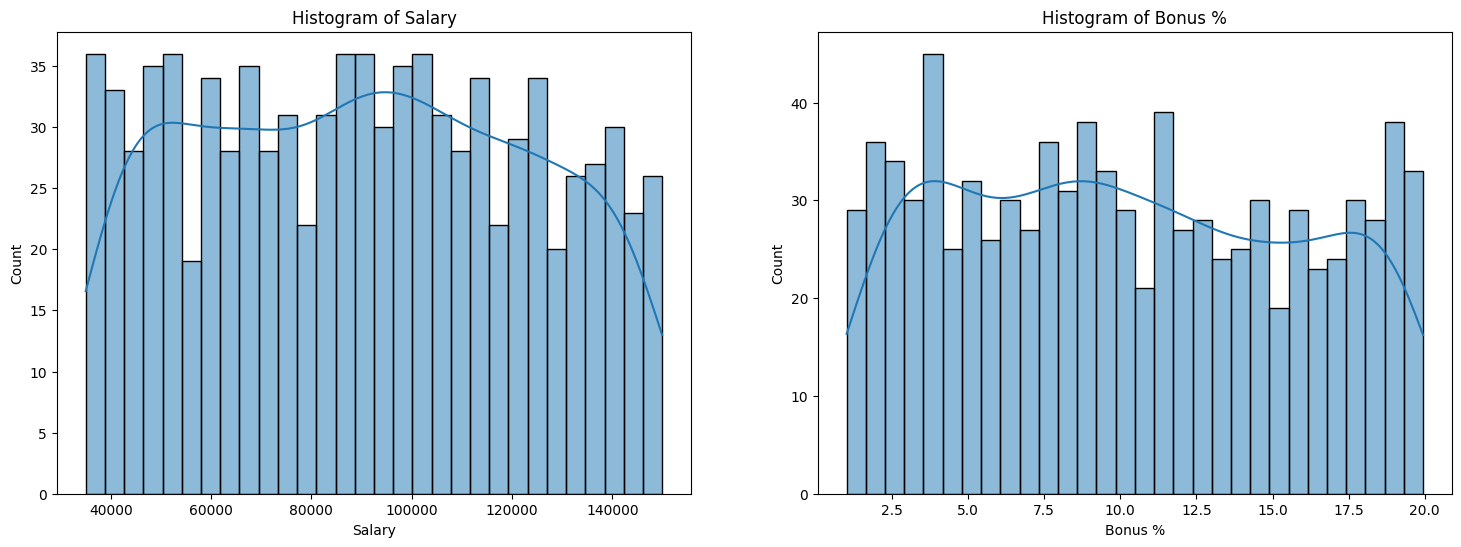

In [17]:
# Univariate Analysis: Histograms for 'Salary' and 'Bonus %'
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data['Salary'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Salary')

sns.histplot(data['Bonus %'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Bonus %')
plt.show()

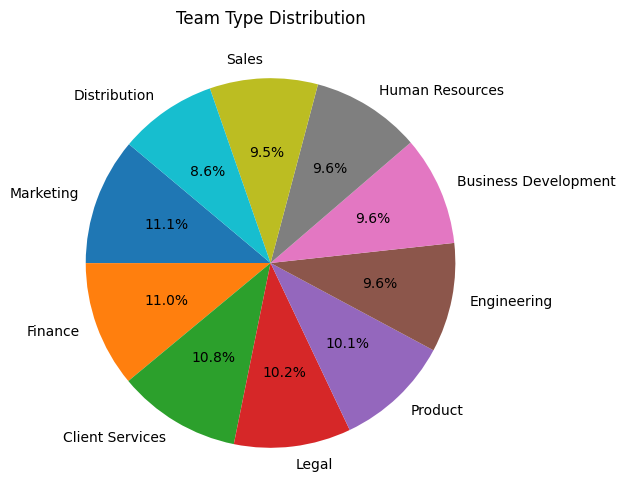

In [18]:
# data["Team"].hist()
plt.figure(figsize=(8, 6))
plt.pie(data['Team'].value_counts(), labels=data['Team'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Team Type Distribution')
plt.show()

Bivariate Analysis
- Boxplot For Data Visualization
- Scatter Plot For Data Visualization

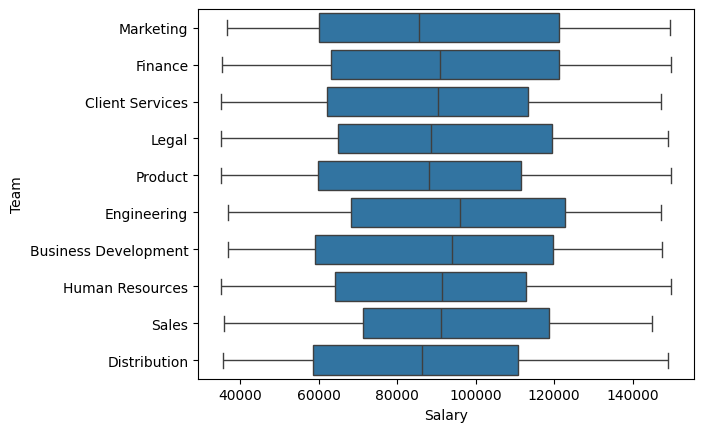

In [19]:
sns.boxplot( x="Salary", y='Team', data=data)
plt.show()

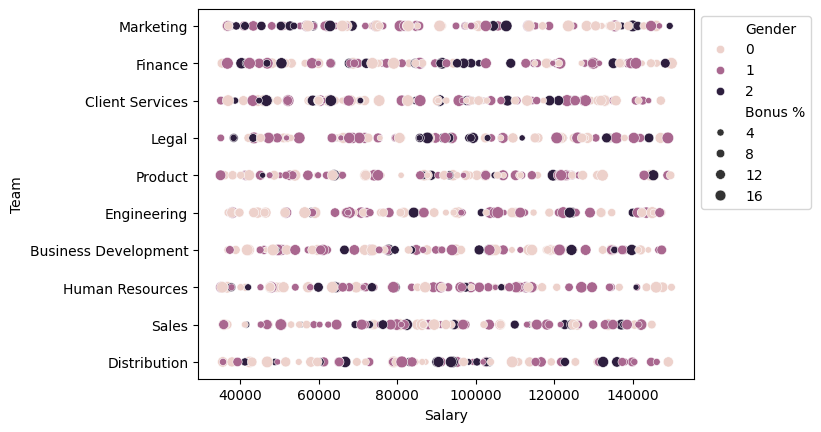

In [20]:
sns.scatterplot( x="Salary", y='Team', data=data, hue='Gender', size='Bonus %')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

Multivariate Analysis

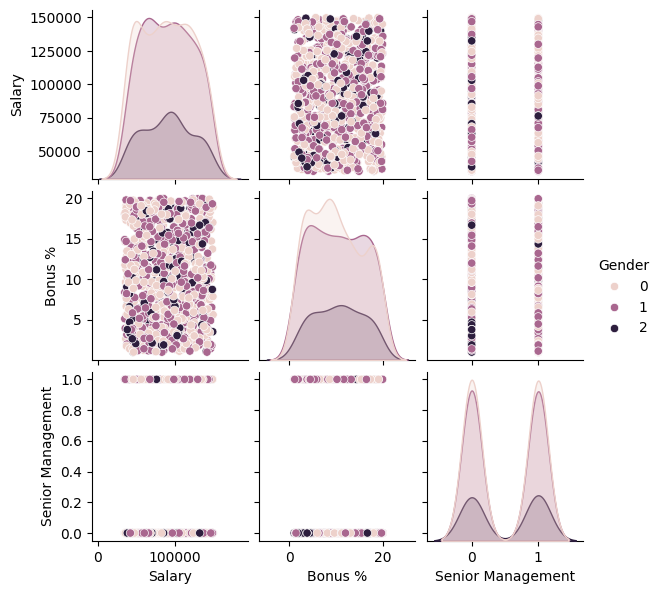

In [21]:
sns.pairplot(data, hue='Gender', height=2)

### Step 6: Handling Outliers

we’ll focus on ‘Salary’ and ‘Bonus %’ as these are critical financial metrics.

We’ll use the Interquartile Range (IQR) method to identify outliers in these variables. The IQR method is robust as it defines outliers based on the statistical spread of the data.

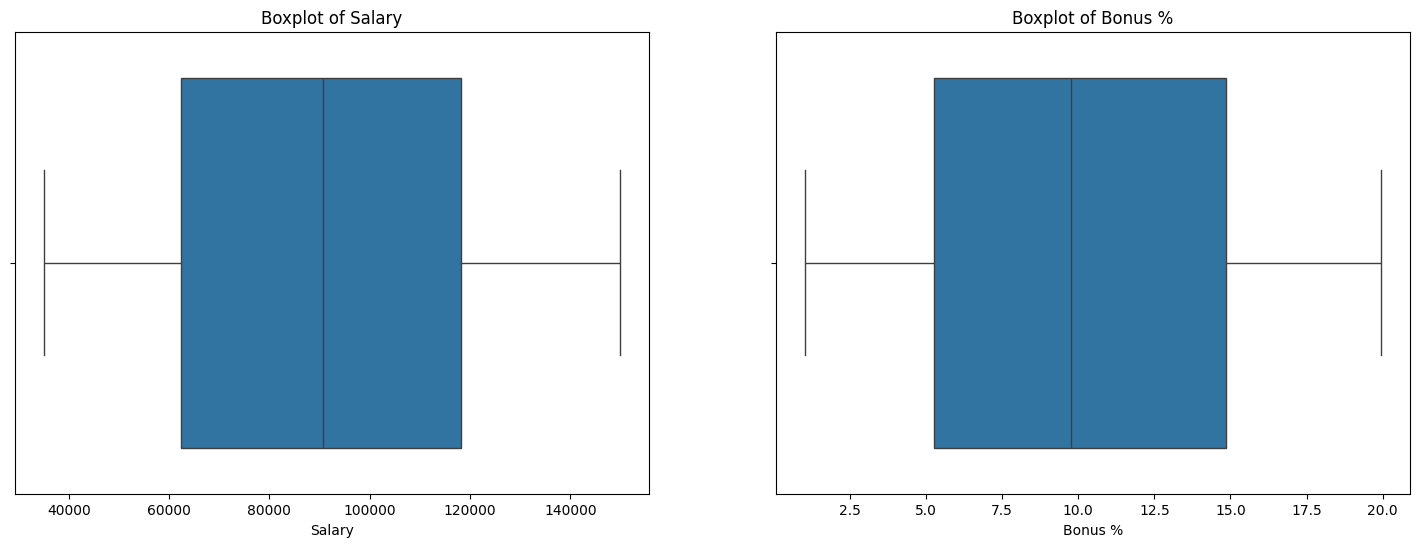

(0, 0)

In [23]:
# Calculate IQR for Salary and Bonus %
Q1_salary = data['Salary'].quantile(0.25)
Q3_salary = data['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

Q1_bonus = data['Bonus %'].quantile(0.25)
Q3_bonus = data['Bonus %'].quantile(0.75)
IQR_bonus = Q3_bonus - Q1_bonus

# Define outliers
outliers_salary = data[(data['Salary'] < (Q1_salary - 1.5 * IQR_salary)) | (data['Salary'] > (Q3_salary + 1.5 * IQR_salary))]
outliers_bonus = data[(data['Bonus %'] < (Q1_bonus - 1.5 * IQR_bonus)) | (data['Bonus %'] > (Q3_bonus + 1.5 * IQR_bonus))]

# Plotting boxplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(x=data['Salary'], ax=axes[0])
axes[0].set_title('Boxplot of Salary')
sns.boxplot(x=data['Bonus %'], ax=axes[1])
axes[1].set_title('Boxplot of Bonus %')

# Show the plots
plt.show()

# Display the number of outliers detected
outliers_salary.shape[0], outliers_bonus.shape[0]